<a href="https://colab.research.google.com/github/AnupamaRajkumar/PyTorchTutorials/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!pip3 install torch

In [112]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [113]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.5)  #random_state seeds the generators
#converting to tensors
data = torch.Tensor(X)
print(data.shape)
label = torch.Tensor(y.reshape(100, 1))
print(label.shape)

torch.Size([100, 2])
torch.Size([100, 1])


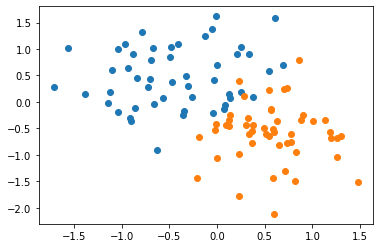

In [114]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [115]:
def scatter_plot():
  plt.plot(X[y==0, 0], X[y==0, 1], 'bo')  #label 0 - blue
  plt.plot(X[y==1, 0], X[y==1, 1], 'ro')  #label 1 - red

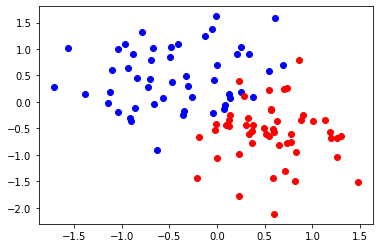

In [116]:
scatter_plot()

In [117]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if(pred >= 0.5):
      return 1
    else:
      return 0

In [118]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [119]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return(w1.item(), w2.item(), b[0].item()) 

In [120]:
def plot_fit(title):
  plt.title = title
  #equation of line
  #w1x1 + w2x2 + b = 0
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = -(w1*x1 + b1)/w2
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

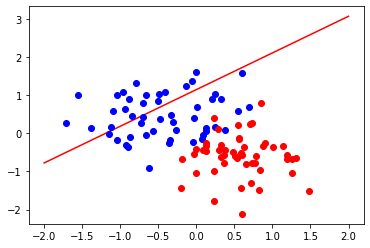

In [121]:
plot_fit('Initial Model')

Model training

In [122]:
criterion = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epochs = 1000
losses = []
for e in range(epochs):
  y_pred = model.forward(data)  
  loss = criterion(y_pred, label)
  print("epoch:", e, "loss:", loss.item())
  losses.append(loss)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

Text(0, 0.5, 'epochs')

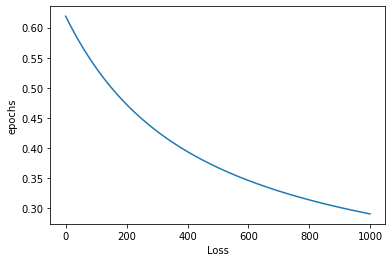

In [124]:
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.ylabel('epochs')

Green point positive probability is = 0.9326364398002625
Black point positive probability is = 0.041176699101924896
Green point is in class = 1
Black point is in class = 0


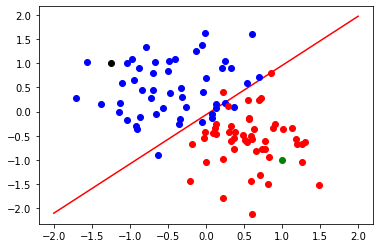

In [125]:
#running prediction
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.25, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'go')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Green point positive probability is = {}".format(model.forward(point1).item()))  #expected probability should be close to 1
print("Black point positive probability is = {}".format(model.forward(point2).item()))  #expected probability should be close to 0
print("Green point is in class = {}".format(model.predict(point1)))          #predicted class should be 1
print("Black point is in class = {}".format(model.predict(point2)))          #predicted class should be 0
plot_fit('Target Model')